# Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

# Loading the Data From the Local system.

In [626]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [627]:
import pandas as pd
df=pd.read_csv("redwine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [628]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [629]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [630]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
213,8.2,0.570,0.26,2.2,0.060,28.0,65.0,0.99590,3.30,0.43,10.1,5
288,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,6
1102,6.1,0.480,0.09,1.7,0.078,18.0,30.0,0.99402,3.45,0.54,11.2,6
1222,8.1,0.530,0.22,2.2,0.078,33.0,89.0,0.99678,3.26,0.46,9.6,6


# EDA Process

In [631]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [632]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [633]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

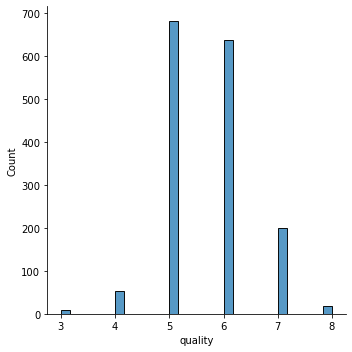

In [634]:
sns.displot(df['quality'])

As seen from above distribution plot that classes are not equally distributed,Hence we have to use imbalance learn for data balancing.

In [635]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As observe from the above there is no null values count,also we will plot on heat map also.

<AxesSubplot:>

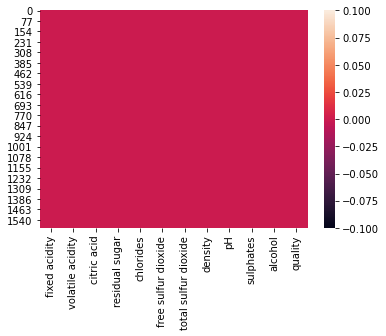

In [636]:
import seaborn as sns
sns.heatmap(df.isnull())

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


from above code we can easily see that majar data is float and our target column is int,we have to scale our data further.

# Scatter plot

lets plot scatter and distribution plots of feature columns

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

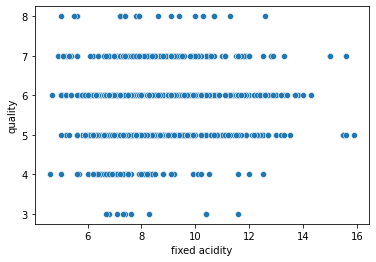

In [638]:
import seaborn as sns
sns.scatterplot(x="fixed acidity",y= "quality",data=df)

as fixed acidity increases quality increase to some extent

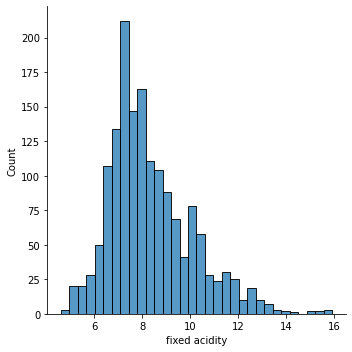

In [640]:
sns.displot(df['fixed acidity'])

as major data is distributed 6 to 14 @fixed acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

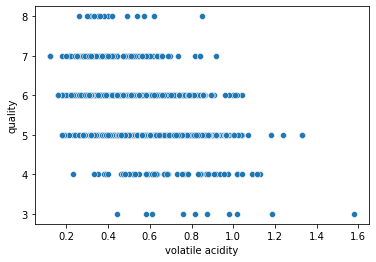

In [641]:
sns.scatterplot(x="volatile acidity",y= "quality",data=df)

as volatile acidity increases quality increase to some extent

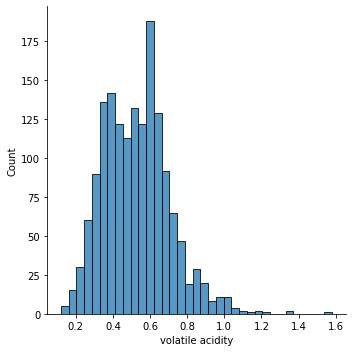

In [642]:
sns.displot(df['volatile acidity'])

As observe from above plotting major distribution of data is from 0.2-0.8

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

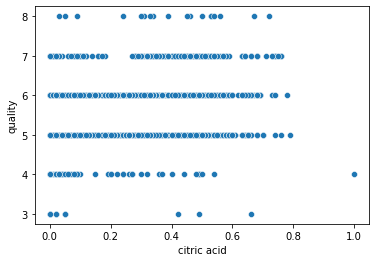

In [643]:
sns.scatterplot(x="citric acid",y= "quality",data=df)

as citric acidity increases quality increase to some extent

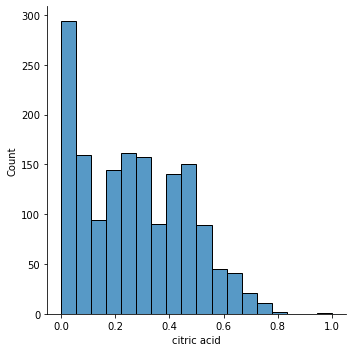

In [644]:
sns.displot(df['citric acid'])

major distribution is from 0.0 to 0.6

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

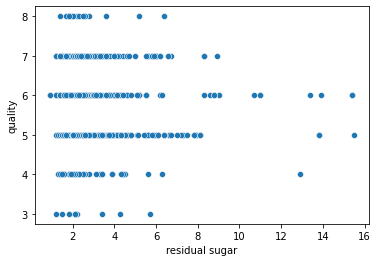

In [645]:
sns.scatterplot(x="residual sugar",y= "quality",data=df)

as residual sugar increases decreases the quality of th wine.

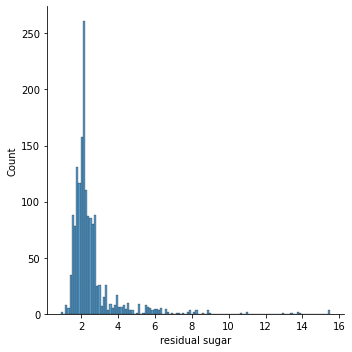

In [646]:
sns.displot(df['residual sugar'])

major distribution is between 2-4.

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

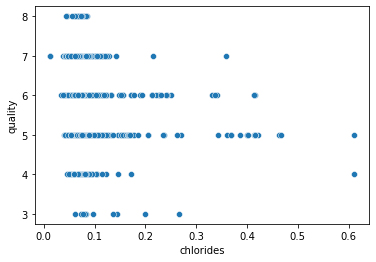

In [647]:
sns.scatterplot(x="chlorides",y= "quality",data=df)

as chlorides increases quality decreases.

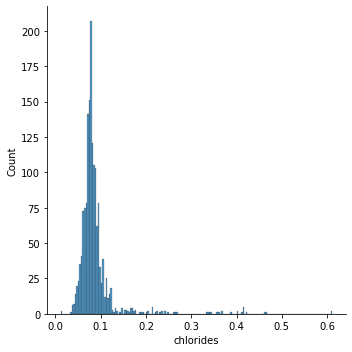

In [648]:
sns.displot(df['chlorides'])

major distribution is from .0 - 0.1

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

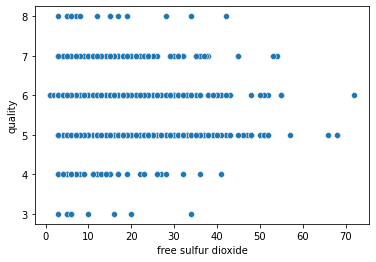

In [649]:
sns.scatterplot(x="free sulfur dioxide",y= "quality",data=df)

as free sulfur dioxide increases quality increase to some extent

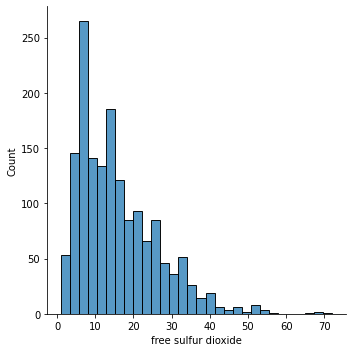

In [650]:
sns.displot(df['free sulfur dioxide'])

major distribution is between 0 - 30

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

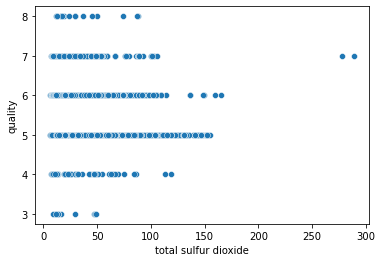

In [651]:
sns.scatterplot(x="total sulfur dioxide",y= "quality",data=df)

as total sulfur dioxide  increases quality decreases.

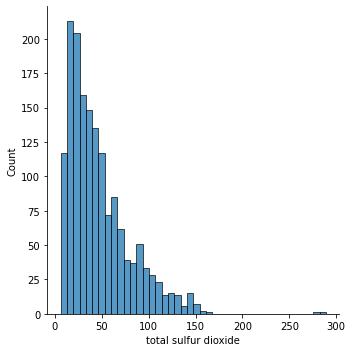

In [652]:
sns.displot(df['total sulfur dioxide'])

major distribution is between 0 - 100

<AxesSubplot:xlabel='density', ylabel='quality'>

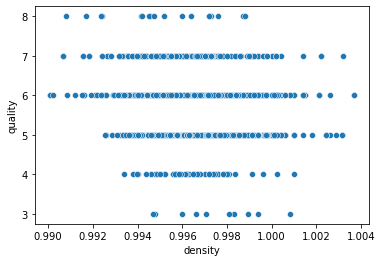

In [653]:
sns.scatterplot(x="density",y= "quality",data=df)

density increases quality of wine increases.

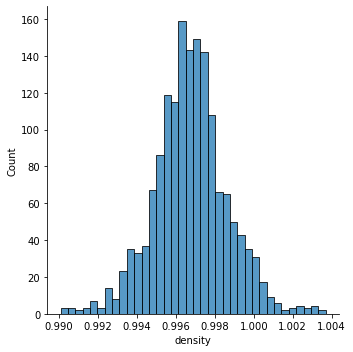

In [654]:
sns.displot(df['density'])

normally distributed

<AxesSubplot:xlabel='pH', ylabel='quality'>

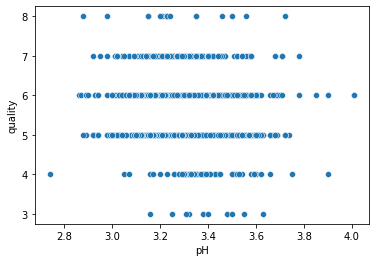

In [655]:
sns.scatterplot(x="pH",y= "quality",data=df)

as ph increases quality increase to some extent

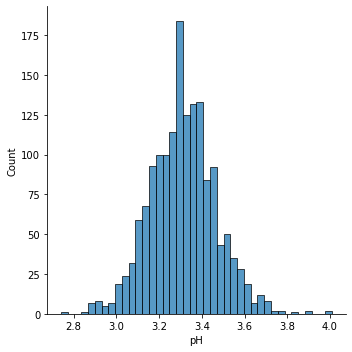

In [656]:
sns.displot(df['pH'])

seems normally distributed

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

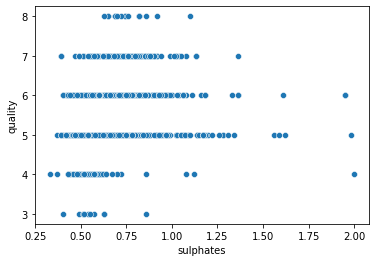

In [657]:
sns.scatterplot(x="sulphates",y= "quality",data=df)

as sulphates increases quality decrerases to some extent

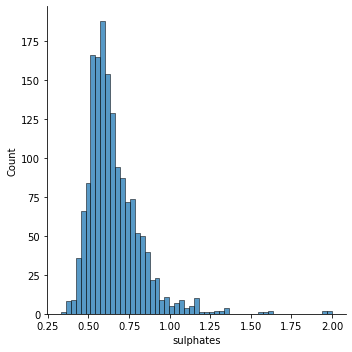

In [658]:
sns.displot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

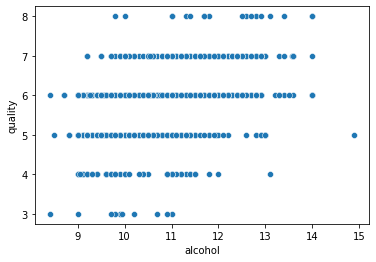

In [659]:
sns.scatterplot(x="alcohol",y= "quality",data=df)

as alcohol content increases quality increase.

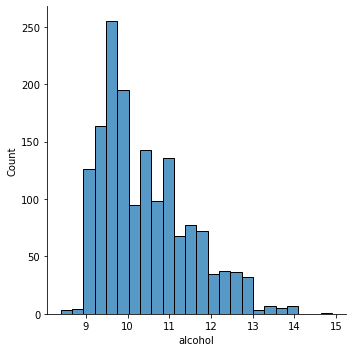

In [660]:
sns.displot(df['alcohol'])

From the above Observations data is not normally distribute

In [661]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Correlation:

In [662]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

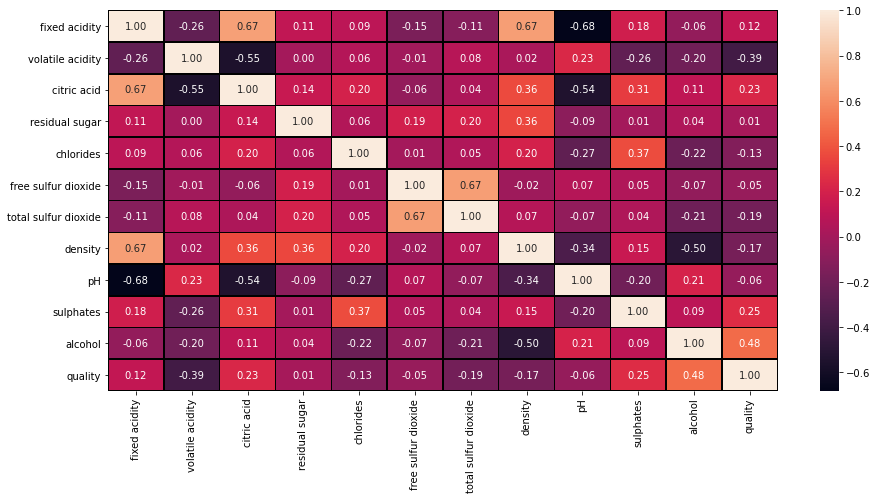

In [663]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')


Correlation:
From the above result it is clear that some columns making positive correlation and some making negative correlation.
positive correlation columns are:
    
    1.fixed acidity
    2.citric acid
    3.residual sugar
    4.sulphates
    5.alcohol
    
Negative correlation columns are:

    1.volatile acidity
    2. cholrides
    3.free sulphur di oxide
    4.total sulphur di oxide
    5.density
    6.ph
    

The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Describe Heatmap

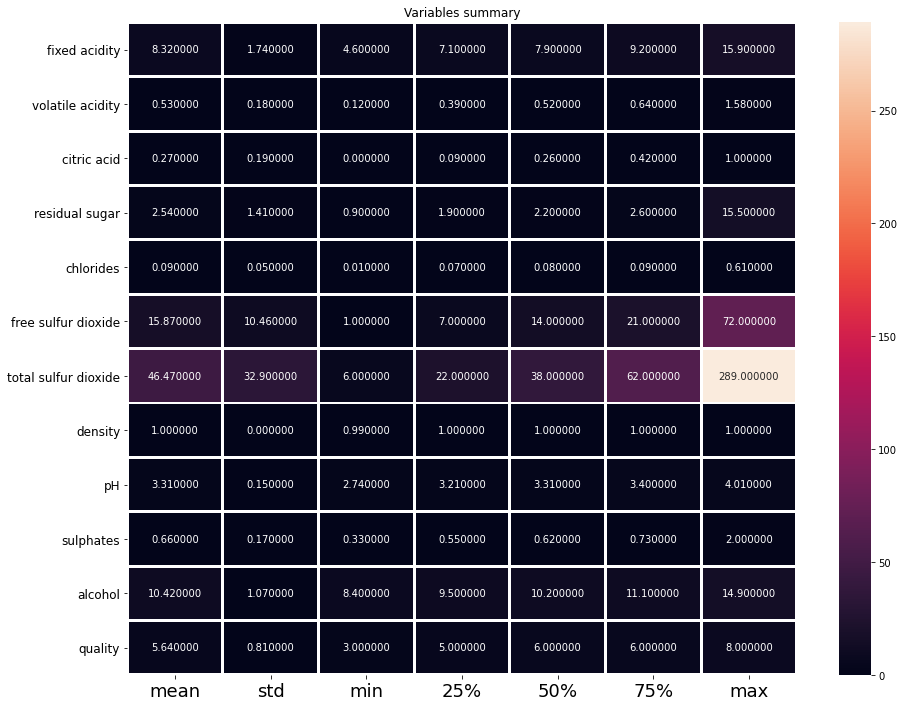

In [664]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


# Discription of dataset

In [665]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


key observations:


    1 the mean is more than median (50th percentile) in all columns
    2 there is large difference in 75% percentile and max in residual sugar, 
    free sulphur diaoxide,totalsulfur diaoxide.
    3 from above two observations there is outliers are present in anove three columns.

# Exploiring data Variables

In [666]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variables is discreate and categorical in nature
quality score scale ranges from 3 to 8;
where 3 is low quality and 8 is best

only scores obtained are between 3 to 8.

In [667]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


Dataset has no missing values.
if there were any , you would notice in figure represented by different colour shade
do try it out with other dataset which as missing values,you'll see the difference.

# Now use subplot and displot to check data are normalised or not.

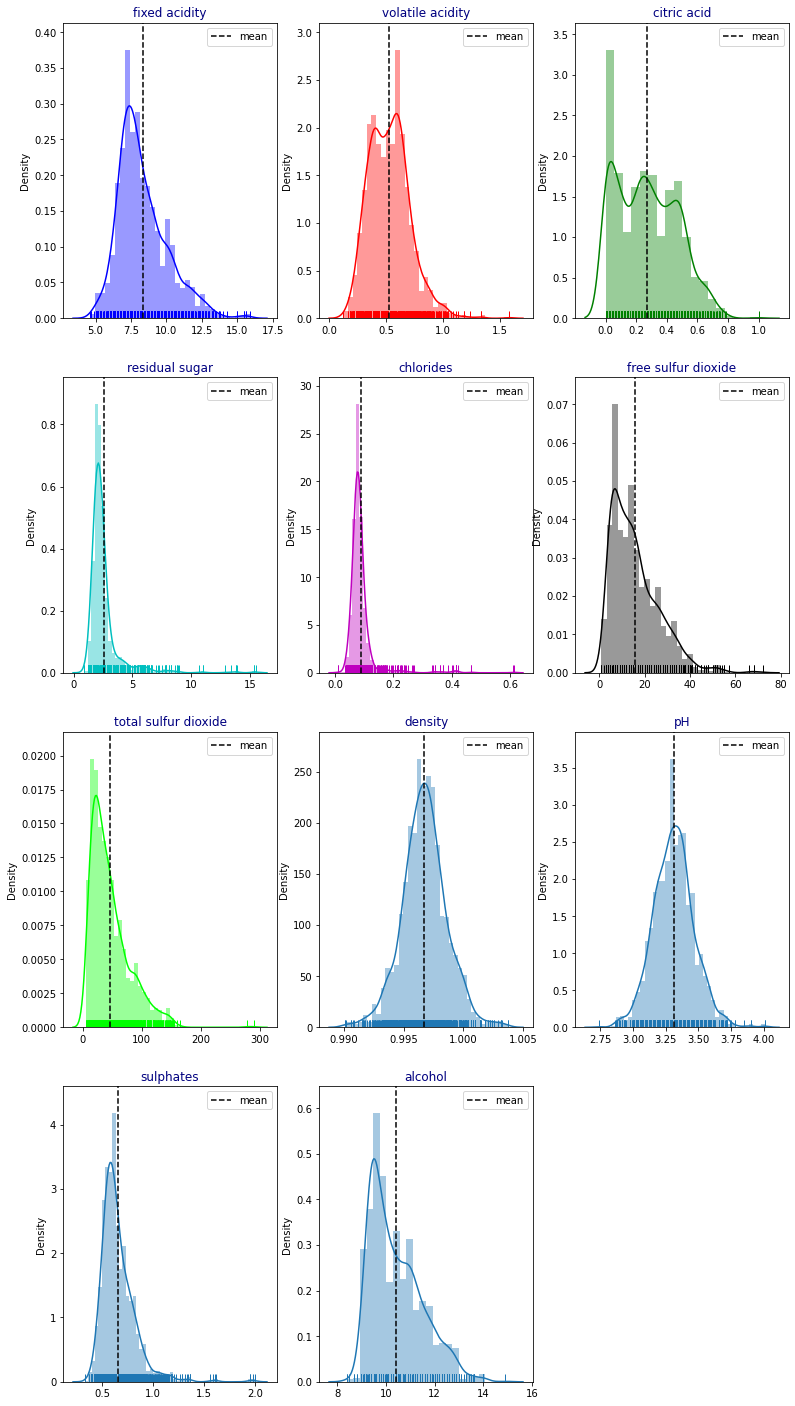

In [668]:
import itertools

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observation:
    As building blocks are out of the normal distribution curve;hence outliers are present and we do data cleaning as well.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

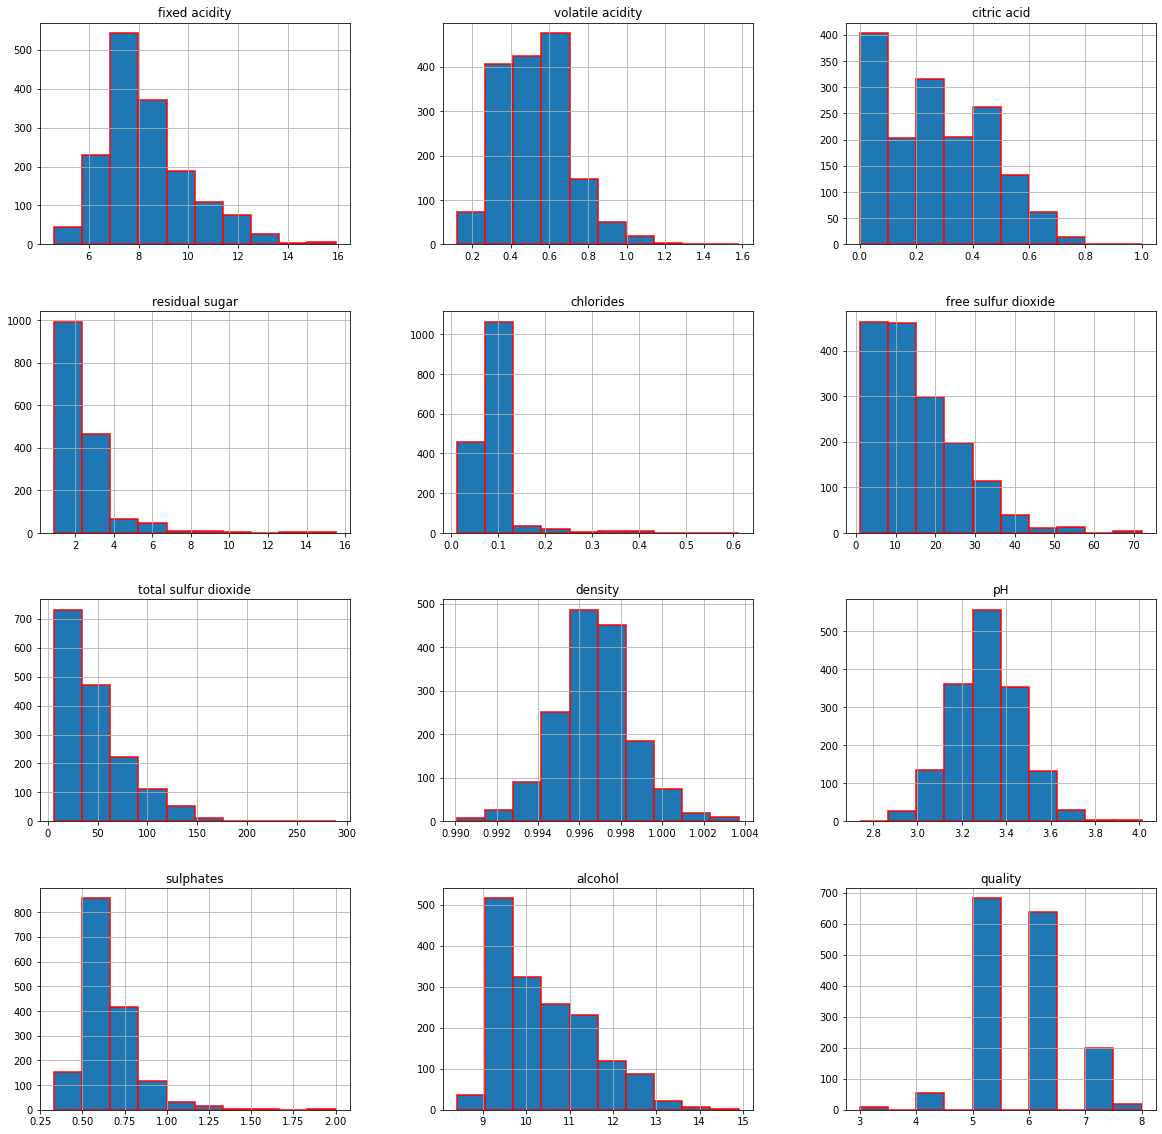

In [669]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

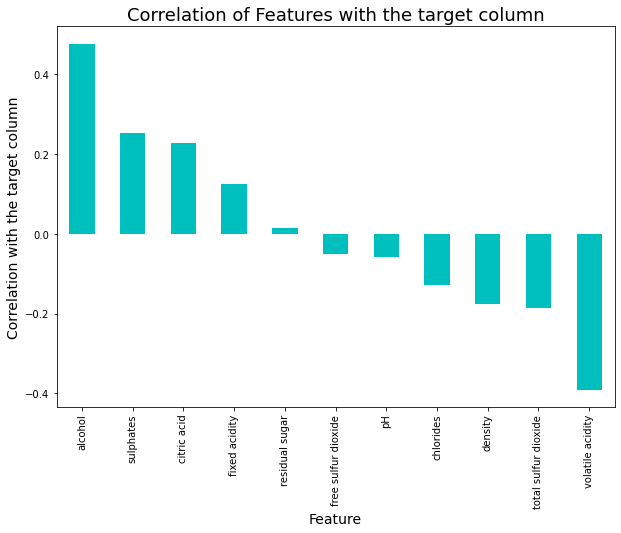

In [670]:
plt.figure(figsize=(10,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [671]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Skewness:
From the above observation the some columns falls under high skewness:

# Detecting outliers 

<AxesSubplot:>

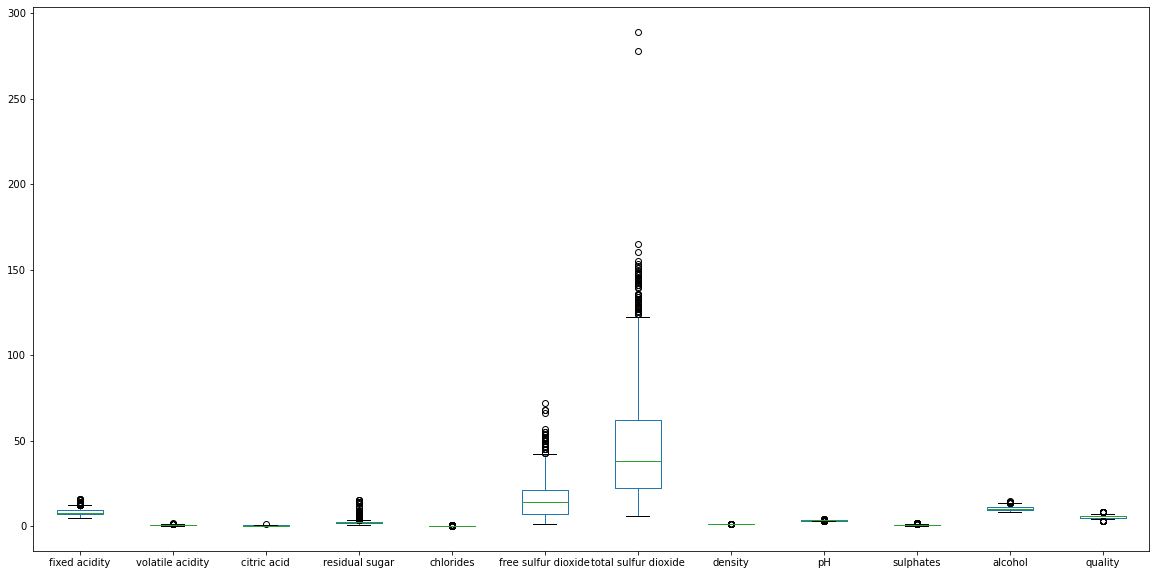

In [672]:
df.plot.box(figsize=(20,10))

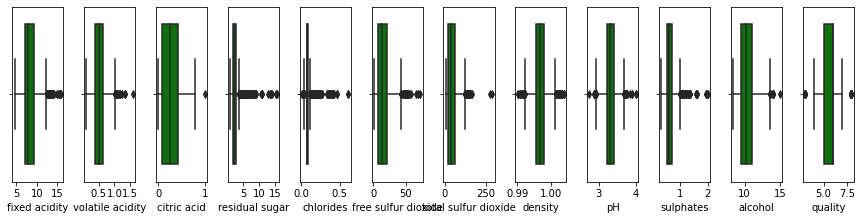

In [673]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in all columns.

# Check the percentage of data falls under outliers:

In [674]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [675]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [676]:
percentage_loss=((1599-1451)/1599)*100
print(percentage_loss)

9.255784865540964


In [677]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# the data loss is below 10 percentile so we can proceed futher data cleaning.

In [678]:
#because volatile acidity made negativly correlated with the target column.
df_new.drop(['residual sugar','total sulfur dioxide'],axis=1,inplace=True)


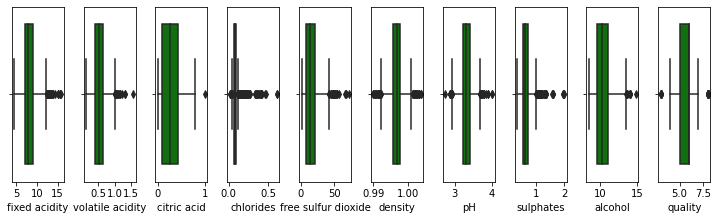

In [679]:
collist=df_new.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


In [680]:
df_new.shape

(1451, 10)

In [681]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,0.99547,3.57,0.71,10.2


In [682]:
x.shape

(1451, 9)

In [683]:
y=df_new.iloc[:,-1]

In [684]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

# Removing skewness by transforming data.

In [685]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [686]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

# Since the column has binary variable we will use logistic classification model

In [688]:
# Create Classification version of target variable
df_new['goodquality'] = [1 if x >= 7 else 0 for x in df_new['quality']]
# Separate feature variables and target variable
X = df_new.drop(['quality','goodquality'], axis = 1)
y = df_new['goodquality']

In [689]:
df_new.quality.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

from above code, we observe that we have 5 unique values lets make it more clear:

# Regressor Model Building:
Logistic Regression:

In [690]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [691]:
from imblearn.over_sampling import SMOTE

In [692]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [693]:
np.bincount(y)

array([1250,  201], dtype=int64)

In [694]:
y_train.value_counts()

1    1250
0    1250
Name: goodquality, dtype: int64

In [695]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 26  The model performs very well
At random_state:- 26
Training accuracy_score is:- 88.27586206896552
Testing accuracy_score is:- 88.31615120274914
At random state 39  The model performs very well
At random_state:- 39
Training accuracy_score is:- 88.70689655172413
Testing accuracy_score is:- 88.65979381443299
At random state 56  The model performs very well
At random_state:- 56
Training accuracy_score is:- 88.70689655172413
Testing accuracy_score is:- 88.65979381443299
At random state 73  The model performs very well
At random_state:- 73
Training accuracy_score is:- 88.27586206896552
Testing accuracy_score is:- 88.31615120274914
At random state 105  The model performs very well
At random_state:- 105
Training accuracy_score is:- 88.70689655172413
Testing accuracy_score is:- 88.65979381443299
At random state 182  The model performs very well
At random_state:- 182
Training accuracy_score is:- 88.70689655172413
Testing accuracy_score is:- 88.65979381443299
At random state 33

In [698]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=929,test_size=0.20)

In [699]:
x_train.shape

(1160, 9)

In [700]:
y_train.shape

(1160,)

In [701]:
x_test.shape

(291, 9)

In [702]:
y_test.shape

(291,)

In [703]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.852233676975945

In [704]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.14776632302405499
Mean Squared Error: 0.14776632302405499
Root Mean Square Error: 0.3844038540702408


In [705]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       248
           1       0.50      0.37      0.43        43

    accuracy                           0.85       291
   macro avg       0.70      0.65      0.67       291
weighted avg       0.84      0.85      0.84       291



In [707]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 84.97349672271302
accuracy_score is :- 85.2233676975945


At cv:- 3
Cross validation score is :- 87.45629644839133
accuracy_score is :- 85.2233676975945


At cv:- 4
Cross validation score is :- 87.25134316545667
accuracy_score is :- 85.2233676975945


At cv:- 5
Cross validation score is :- 87.25014812181537
accuracy_score is :- 85.2233676975945


At cv:- 6
Cross validation score is :- 87.18093801081353
accuracy_score is :- 85.2233676975945


At cv:- 7
Cross validation score is :- 87.25049105483889
accuracy_score is :- 85.2233676975945


At cv:- 8
Cross validation score is :- 87.38844028899277
accuracy_score is :- 85.2233676975945


At cv:- 9
Cross validation score is :- 87.80214537058337
accuracy_score is :- 85.2233676975945




In [708]:
lrscore=cross_val_score(lr,x,y,cv=2)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 87.80214537058337
accuracy_score is :- 85.2233676975945


In [709]:
lrs*100

85.2233676975945

In [710]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[232  16]
 [ 27  16]]
0.852233676975945
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       248
           1       0.50      0.37      0.43        43

    accuracy                           0.85       291
   macro avg       0.70      0.65      0.67       291
weighted avg       0.84      0.85      0.84       291



# Regurlarization

As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [711]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [712]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [714]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=0.0001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=38)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: -0.9658664666166494
Cross Val Score: 87.05341288443783


In [715]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.12714776632302405
Mean Squared Error: 0.12714776632302405
Root Mean Square Error: 0.3565778545044883


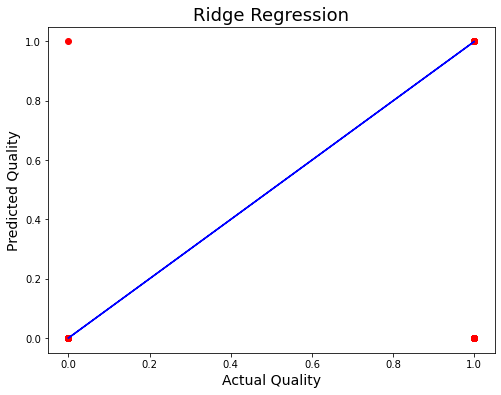

In [716]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

In [717]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.872852233676976
[[247   1]
 [ 36   7]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       0.88      0.16      0.27        43

    accuracy                           0.87       291
   macro avg       0.87      0.58      0.60       291
weighted avg       0.87      0.87      0.83       291



# Ensemble Techniques:

# DecisionTreeClassifier

In [718]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [719]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features = 'log2')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=38)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: -0.9658664666166494
Cross Val Score: 82.41352368776191


In [720]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.12714776632302405
Mean Squared Error: 0.12714776632302405
Root Mean Square Error: 0.3565778545044883


In [721]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.872852233676976
[[226  22]
 [ 15  28]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       248
           1       0.56      0.65      0.60        43

    accuracy                           0.87       291
   macro avg       0.75      0.78      0.76       291
weighted avg       0.88      0.87      0.88       291



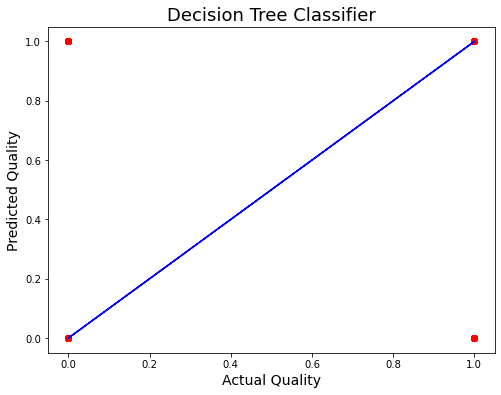

In [722]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [723]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [730]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=2)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 7.22055513878469
Cross Val Score: 84.55979861309015


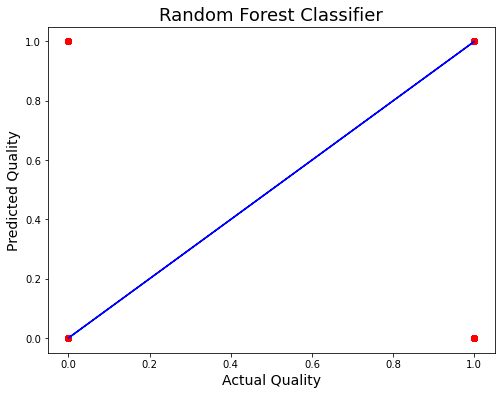

In [731]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

In [732]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.8831615120274914
[[233  15]
 [ 19  24]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       248
           1       0.62      0.56      0.59        43

    accuracy                           0.88       291
   macro avg       0.77      0.75      0.76       291
weighted avg       0.88      0.88      0.88       291



# Support Vector Classifier

In [733]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto'],'cache_size':[50,100,200,300] }
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [734]:
sv = SVC(kernel='poly',gamma='scale',cache_size=50)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)

svs = r2_score(y_test,pred_support)
print('R2 Score:',rfs*100)

svscore = cross_val_score(sv,x,y,cv=2)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 7.22055513878469
Cross Val Score: 86.00864443811153


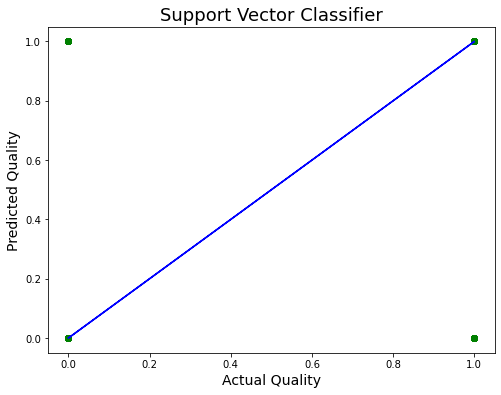

In [735]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='g')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

In [736]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_support))
print('Mean Squared Error:',mean_squared_error(y_test,pred_support))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_support)))


Error:
Mean Absolute Error: 0.13745704467353953
Mean Squared Error: 0.13745704467353953
Root Mean Square Error: 0.37075199888003235


In [737]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8625429553264605
[[235  13]
 [ 27  16]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       248
           1       0.55      0.37      0.44        43

    accuracy                           0.86       291
   macro avg       0.72      0.66      0.68       291
weighted avg       0.85      0.86      0.85       291



# KNeighborsClassifier

In [738]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


In [739]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'distance',n_neighbors=15)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)

kns = r2_score(y_test,pred_k)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=38)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: 7.22055513878469
Cross Val Score: 1.7615952837559485


In [741]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.11683848797250859
Mean Squared Error: 0.11683848797250859
Root Mean Square Error: 0.3418164536304661


In [742]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8625429553264605
[[235  13]
 [ 27  16]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       248
           1       0.55      0.37      0.44        43

    accuracy                           0.86       291
   macro avg       0.72      0.66      0.68       291
weighted avg       0.85      0.86      0.85       291



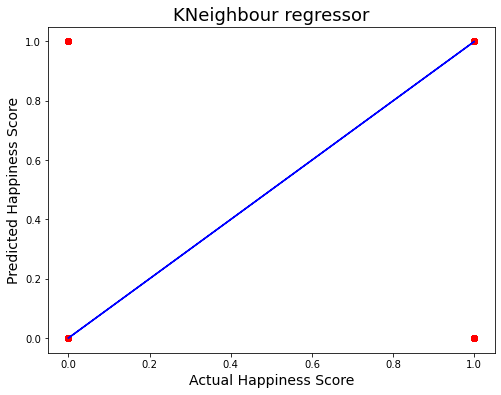

In [743]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_k, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('KNeighbour regressor',fontsize=18)
plt.show()


#  We tested 5 models out of which random forest performing good:


The best model is Random forest classifier. 

In [744]:
import pickle
filename = 'RedWine.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [745]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({'Original':a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
286,0,0
287,0,0
288,1,1
289,0,0


In [747]:
df_com.sample(10)

,Original,Predicted
241,0,0
250,0,0
275,1,1
78,1,1
169,0,0
234,0,0
114,0,0
38,1,0
147,0,0
179,0,0


# Our model performs almost 90% Accuracy